In [1]:
import pandas as pd

In [4]:
 from google.colab import files
 uploaded = files.upload()

Saving College_Event_Feedback.csv to College_Event_Feedback.csv


In [5]:
df = pd.read_csv('College_Event_Feedback.csv')

In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Timestamp    60 non-null     object
 1   Event Name   60 non-null     object
 2   Feedback     60 non-null     object
 3   Rating       60 non-null     int64 
 4   Suggestions  53 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.5+ KB


,0
Timestamp,0
Event Name,0
Feedback,0
Rating,0
Suggestions,7


In [8]:
df.dropna(subset=['Feedback'], inplace=True)

In [9]:
from textblob import TextBlob


In [10]:
df['Sentiment_Polarity'] = df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [11]:
df['Sentiment'] = df['Sentiment_Polarity'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

In [15]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [17]:
df['Sentiment_Score'] = df['Feedback'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['Sentiment'] = df['Sentiment_Score'].apply(
    lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral')
)

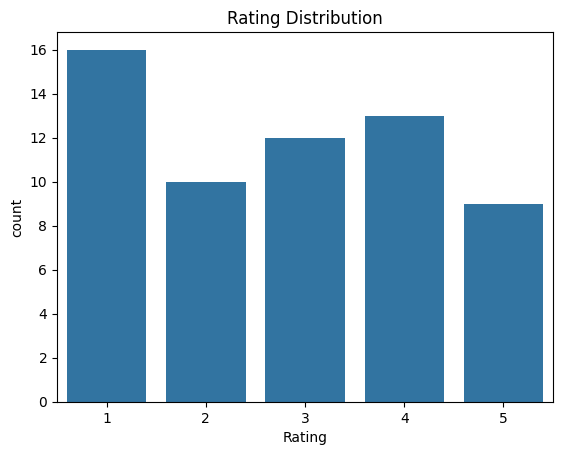

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Rating', data=df)
plt.title("Rating Distribution")
plt.show()


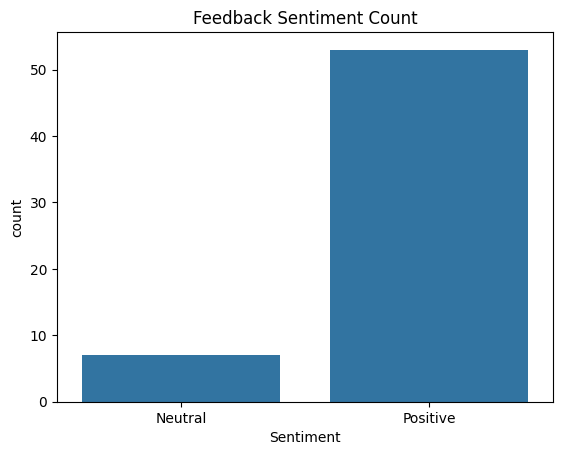

In [19]:
sns.countplot(x='Sentiment', data=df)
plt.title("Feedback Sentiment Count")
plt.show()


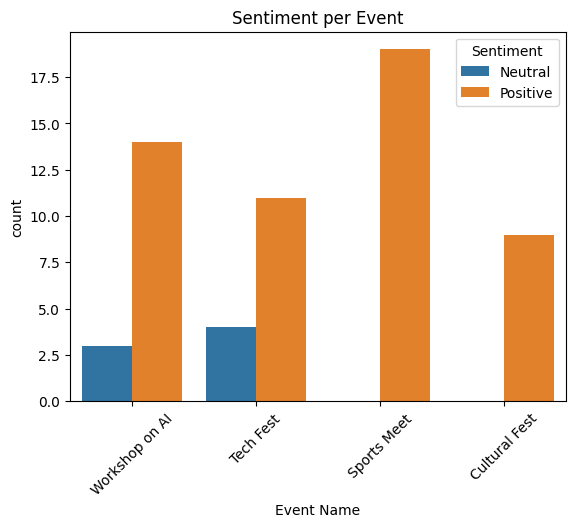

In [20]:
sns.countplot(x='Event Name', hue='Sentiment', data=df)
plt.title("Sentiment per Event")
plt.xticks(rotation=45)
plt.show()


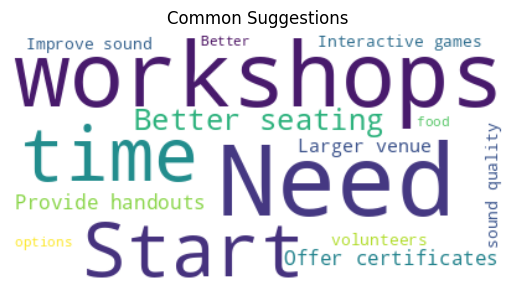

In [21]:
from wordcloud import WordCloud

text = ' '.join(df['Suggestions'].dropna())
wordcloud = WordCloud(background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Suggestions")
plt.show()


In [22]:
df.to_csv("Cleaned_College_Feedback.csv", index=False)
